# I-94 INTERSTATE HIGHWAY ANALYSIS

# INDICATOR OF HEAVY TRAFFIC ON I-94 


> IN THIS PROJECT IS ANALYSIS A DATASET ABOUT WEST BOUND TRAFFICON TRAFFIC ON I-94

> USING WESTBOUND TRAFFIC ON THE I-94 INTERSTATE HIGHWAY DATASET. 

> UCI MACHINE LEARNING REPORSITORY BY JOHN HOGUE.

> THE GOAL OF OUR ANALYSIS IS TO DETERMINE A FEW INDICATORS OF HEAVY TRAFFIC ON I-94. THESE INDICATORS CAN BE WEATHER TYPE, TIME OF THE DAY, TIME OF THE WEEK, ETC. 

# IMPORT LIBRARIES

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# READ CSV FILE AND SHOW FIRST FIVE ROWS
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(i_94.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [7]:
# SHOW LAST FIVE ROWS
print(i_94.tail()) 

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [8]:
# SHOW DETAILS
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# EXPLORE EARLIER DATASET

> THIS DATASET DON'T HAVE ANY MISSING VALUES. 

> THIS DATASET HAVE 48,204 ROWS AND 9 COLUMNS.

> THIS DATASET HAVE 3 FLOAT, 2 INT AND 4 OBJECTS DATATYPE.

* EACH ROW DESCRIBES TRFAFIC AND WEATHER DATA FOR A SPECIFIC HOUR - WE HAVE DATA FROM 2012-20-02 09:00:00 UNTIL 2018-09-30 23:00:00.

A STATION LOCATED APPROXIMATELY MIDWAY BETWEEN MINNEAPOLIS AND SAINT PAUL RECORDS THE TRAFFIC DATA (SEE THE DATASET DOCUMENTATION). FOR THIS STATION, THE DIRECTION OF THE ROUTE IS WESTBOUND (I.E., CARS MOVING FROM EAST TO WEST). 

THIS MEANS THAT THE RESULTS OF OUR ANALYSIS WILL BE ABOUT THE WESTBOUND TRAFFIC IN THE PROXIMITY OF THE STATION. IN OTHER WORDS, WE SHOULD AVOID GENERAILIZING OUR RESULTS FOR THE ENTIRE I-94 HIGHWAY.

# ANALYZING TRAFFIC VOLUME

<function matplotlib.pyplot.show(close=None, block=None)>

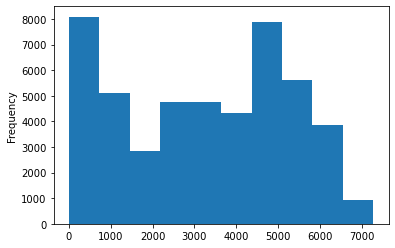

In [9]:
# PLOT FREQUENCY TRAFFIC HISTOGRAM
i_94['traffic_volume'].plot.hist()
plt.show

In [10]:
# DESCRIBE VOLUMN COLUMN
i_94['traffic_volume'].describe().reset_index()

,index,traffic_volume
0,count,48204.000000
1,mean,3259.818355
2,std,1986.860670
3,min,0.000000
4,25%,1193.000000
5,50%,3380.000000
6,75%,4933.000000
7,max,7280.000000


* BETWEEN 2012-10-02 09:00:00 AND 2018-09-30 23:00:00, THE HOURLY TRAFFIC VOLUME VARIED FROM 0 TO 7,280 CARS. 

* THE AVERAGE IS 3,260 CARS AND STANDARD DEVIATION IS 1,987 CARS.

* ABOUT 25% OF THE TIME, THERE WRE ONLY 1,193 CARS OR FEWER PASSING THE STATION EACH HOUR - THIS PROBABLY OCCURS DURING THE NIGHT.

* HOWEVER, ABOUT 25% OF THE TIME, THE TRAFFIC VOLUME WAS FOUR TIMES AS MUCH (4,933 CARS OR MORE).

* THIS OBSERVATION GIVES OUR ANALYSIS AN INTERESTING DIRECTION: COMPARING DAYTIME DATA WITH NIGHTTIME DATA.

## TRAFFIC VOLUME: DAY VS NIGHT

###### WE WILL START BY DIVIDING THE DATASET INTO TWO PARTS: 
    
    DAYTIME DATA: HOURS FROM 7 AM TO 7 PM (12 HOURS)
    NIGHTTIME DATA: HOURS FROM 7 PM TO 7 AM (12 HOURS)

WHILE THIS IS NOT A PERFECT CRITERION FOR DISTUNGUISHING BETWEEN NIGHTTIME AND DAYTIME,
IT'S A GOOD STARTING POINT.

In [11]:
# CREATE DATETIME AND ASSIGN TO COLUMN
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

# SEPARATE BETWEEN DAYTIME AND NIGHTTIME
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

print(f'This data contains the day time between 6 am to 6 pm have {day.shape[0]} rows and {day.shape[1]} columns.')
print(f'This data contains the night time between 6 pm to 6 am have {night.shape[0]} rows and {night.shape[1]} columns.')
print(f'These 2 variables contain time intervals all day have {day.shape[0] + night.shape[0]} rows.')

This data contains the day time between 6 am to 6 pm have 23877 rows and 9 columns.
This data contains the night time between 6 pm to 6 am have 24327 rows and 9 columns.
These 2 variables contain time intervals all day have 48204 rows.


WE ARE GOING TO LOOK AT THE HISTOGRAMS OF TRAFFIC VOLUME SIDE-BY-SIDE BY USING A GRID CHART.

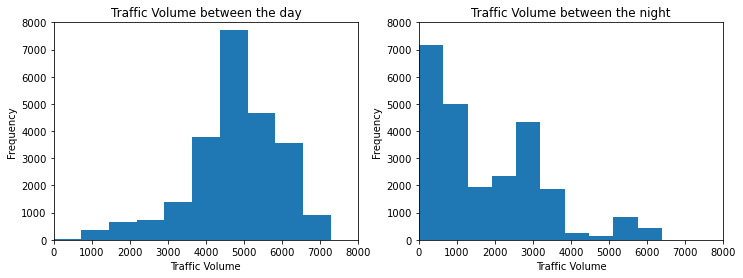

In [13]:
# PLOT TRAFFIC HISTOGRAM IN DAYTIME
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.title('Traffic Volume between the day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

# PLOT TRAFFIC HISTOGRAM IN NIGHTTIME
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.title('Traffic Volume between the night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [14]:
# SHOW DETAILS IN DAY TIME
print(f'Describe for the day time: ')
display(day.traffic_volume.describe().reset_index())
print()
# SHOW DETAILS IN DAY TIME
print(f'Describe for the night time: ')
display(night.traffic_volume.describe().reset_index())

Describe for the day time: 


,index,traffic_volume
0,count,23877.000000
1,mean,4762.047452
2,std,1174.546482
3,min,0.000000
4,25%,4252.000000
5,50%,4820.000000
6,75%,5559.000000
7,max,7280.000000



Describe for the night time: 


,index,traffic_volume
0,count,24327.000000
1,mean,1785.377441
2,std,1441.951197
3,min,0.000000
4,25%,530.000000
5,50%,1287.000000
6,75%,2819.000000
7,max,6386.000000


THE HISTOGRAM THAT SHOWS THE DISTRIBUTION OF TRAFFIC VOLUME DURING THE DAY IS LEFT SKEWED.

THIS MEANS THAT MOST OF THE TRAFFIC VOLUME VALUES ARE HIGH - THERE ARE 4,252 OR MORE CARS PASSING THE STATION EACH HOUR 75% OF THE TIME (BECAUSE 25% OF VALUES ARE LESS THAN 4,252).

THE HISTOGRAM DISPLAYING THE NIGHTTIME DATA IS RIGHT SKEWED. THIS MEANS THAT MOST OF THE TRAFFIC VOLUME VALUES ARE LOW - 75% OF THE TIME, THE NUMBER OF CARS THAT PASSED THE STATION
EACH HOUR WAS LESS THAN 2,819.

ALTHOUGH THERE ARE STILL MEASUREMENTS OF OVER 5,000 CARS PER HOUR, THE TRAFFIC AT NIGHT IS GENERALLY LIGHT. OUR GOAL IS TO FIND INDICATORS OF HEAVY TRAFFIC, SO WE WILL ONLY FOCUS ON THE DAYTIME DATA MOVING FORWARD.

## TIME INDICATORS 

> ONE OF THE POSSIBLE INDICATORS OF HEAVY TRAFFIC IS TIME. THERE MIGHT BE MORE PEOPLE ON THE ROAD IN A CERTAIN MONTH, ON A CERTAIN DAY, OF AT A CERTAIN TIME OF DAY.

WE ARE GOIN TO LOOK AT A FEW LINE PLOTS SHOWING HOW THE TRAFFIC VOLUME CHANGED ACCORDING TO THE FOLLOWING PARAMETERS:

* MONTH

* DAY OF THE WEEK

* TIME OF DAY

Describe for the day of week: 


,month,traffic_volume
0,1,4495.613727
1,2,4711.198394
2,3,4889.409560
3,4,4906.894305
4,5,4911.121609
...,...,...
7,8,4928.302035
8,9,4870.783145
9,10,4921.234922
10,11,4704.094319


Text(0, 0.5, 'Traffic Volume')

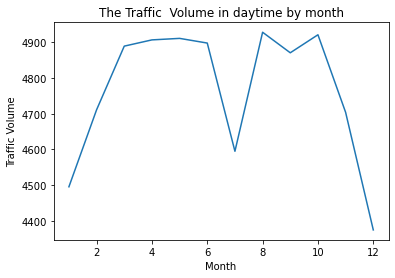

In [15]:
# SHOW TRAFFIC VOLUME IN EACH MONTH
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
print(f'Describe for the day of week: ')
display(by_month['traffic_volume'].reset_index())
# plt.figure(figsize=(8, 4))
by_month['traffic_volume'].plot.line()
plt.title('The Traffic  Volume in daytime by month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
# plt.ylim(4200, 5000)

WE HAVE FOUND THAT THE TRAFFIC VOLUME AVERAGE BY MONTH LOOKS LESS HEAVY DURING COLD MONTHS (NOV-FEB) AND LOOKS MORE INTERSE AGAIN DURING WARM MONTHS (MAR-OCT)

ONE INTERESTING EXCEPTION IS JULY. THE TRAFFIC SIGNIFICANTLY LESS HEAVY IN JULY EACH YEAR OR NOT?

TO FIND THE ANSWER OF THIS POINT. LET'S FOLLOW THE NEXT STEP FOCUS IN JULY EACH YEAR.

Describe for July in each year: 


,index,traffic_volume
0,count,2378.000000
1,mean,4595.035744
2,std,1279.496676
3,min,0.000000
4,25%,4098.250000
5,50%,4706.500000
6,75%,5434.500000
7,max,7090.000000


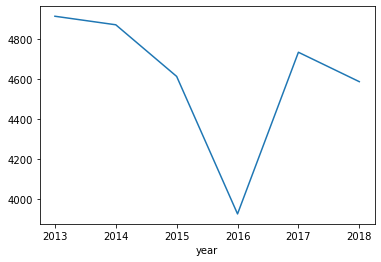

In [16]:
# SHOW DETAIL AND VISUALIZED IN EACH YEAR
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
print(f'Describe for July in each year: ')
display(july['traffic_volume'].describe().reset_index())
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

TYPICALLY, THE TRAFFIC IS PRETTY HEAVY IN JULY, SIMILAR TO THE OTHER WARM MONTHS. THE ONLY 
EXCEPTION WE SEE IS 2016, WHICH HAD A HIGH DECREASE IN TRAFFIC VOLUM. ONE POSSIBLE REASON FOR THIS IS ROAD CONSTRUCTION - THIS ARTICLE FROM 2016 SUPPORTS THIS HYPOTHESIS.

AS A TENTATIVE CONCLUSION HERE, WE CAN SAY THAT WARM MONTHS GENERALLY SHOW HEAVIER TRAFFIC COMPARED TO COLD MONTHS. IN A WARM MONTH, YOU CAN EXPECT FOR EACH HOUR OF DAYTIME A TRAFFIC VOLUME CLOSE TO 5,000 CARS.

In [17]:
# CREATE COLUMN DAY OF WEEK
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

print(f'Describe for the day of week: ')
display(by_dayofweek['traffic_volume'].describe().reset_index())  # 0 is Monday, 6 is Sunday

Describe for the day of week: 


,index,traffic_volume
0,count,7.000000
1,mean,4761.958037
2,std,764.684759
3,min,3436.541789
4,25%,4410.400422
5,50%,5189.004782
6,75%,5288.027555
7,max,5311.303730


In [19]:
# CREATE COLUMN HOUR BETWEEN BUSINESS DAY AND WEEKEND DAY
day['hour'] = day['date_time'].dt.hour
bussiness_day = day.copy()[day['dayofweek'] <= 4] # 0, 1, 2, 3, 4 = Mon, Tue, Wed , Thu, Fri
weekend_day = day.copy()[day['dayofweek'] >= 5] # 5, 6 = Sat, Sun
by_hour_business = bussiness_day.groupby('hour').mean()
by_hour_weekend = weekend_day.groupby('hour').mean()

print(f'The average traffic volumn by hour business day: {by_hour_business["traffic_volume"]}')
print()
print(f'The average traffic volumn by hour weekend day: {by_hour_weekend["traffic_volume"]}')

The average traffic volumn by hour business day: hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

The average traffic volumn by hour weekend day: hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


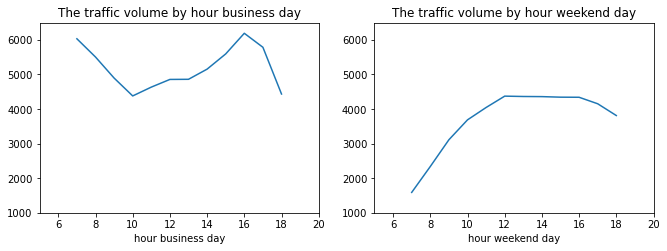

In [20]:
# PLOT THE TRAFFIC VOLUME BY HOUR BUSINESS DAY
plt.figure(figsize=(11, 3.5))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('The traffic volume by hour business day')
plt.xlabel('hour business day')
plt.xlim(5, 20)
plt.ylim(1000, 6500)

# PLOT THE TRAFFIC VOLUME BY HOUR WEEKEND DAY
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('The traffic volume by hour weekend day')
plt.xlabel('hour weekend day')
plt.xlim(5, 20)
plt.ylim(1000, 6500)

plt.show()

AT THE HOUR BUSINESS DAY THAT SHOW THE HIGHER TRAFFIC VOLUME START FROM 7 AM AND DECREASEING UNTIL 10 AM THAT ARE THE TIME THE PEOPLE GO TO WORK THEN INCREASING ABOUT 4 PM TO 5 PM AFTER THAT TEND TO DECRASE AGAIN AS USAULLY IN BUSINESS DAY. WE SEE VOLUMNS OF OVER 6,00 CARS AT RUSH HOURS.

AND AT THE HOUR WEEKEND DAY THAT SHOW THE LOWER TRAFFIC VOLUME LESS THAN BUSINESS DAY. IT'S SO MAKE SENSE THE REASON IS WEEKEND THE PEOPLE STOP TO WORK AND RELAX AT HOME. THAT WHY THE TRAFFIC IS LESS.

SO FAR, WE HAVE FOCUSED ON FINDING TIME INDICATORS FOR HEAVY TRAFFIC, AND WE REACHED THE FOLLOWING CONCLUSIONS:

    THE TRAFFIC IS USUALLY HEAVIER DURING WARM MONTHS (MARCH-OCTOBER) COMPARED TO COLD -MONTHS (NOVEMBER-GEBRUARY).
    
    THE TRAFFIC IS USUALLY HEAVIER ON BUSINESS DAYS COMPARED TO WEEKENDS.
    
    ON BUSINESS DAYS, THE RUSH HOURS ARE AROUND 7 AND 16.

## WEATHER INDICATORS


* ANOTHER POSSIBLE INDICATOR OF HEAVY TRAFFIC IS WEATHER. 


* THE DATASET PROVIDES US WITH A FEW USEFUL COLUMNS ABOUT WEATHER

    * TEMP
    * RAIN_1H
    * SNOW_1H
    * CLOUDS_ALL
    * WEATHER_MAIN
    * WEATHER_DESCRIPTION
    
> LET'S SEE THE CORRELATION BETWEEN WEATHER INDICATORS AND TRAFFIC VOLUME

In [21]:
# SHOW FEATURES CORRELATION
i_94.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


,temp,traffic_volume
0,288.28,5545
1,289.36,4516
2,289.58,4767
3,290.13,5026
4,291.14,4918
...,...,...
48199,283.45,3543
48200,282.76,2781
48201,282.73,2159
48202,282.09,1450


<Figure size 792x252 with 0 Axes>

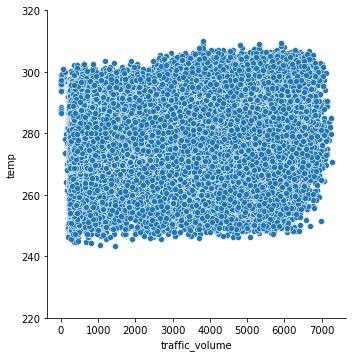

In [22]:
# PLOT CORRELATION BETWEEN TEMP AND TRAFFIC_VOLUME COLUMNS
plt.figure(figsize=(11, 3.5))
# sns.set_theme()

data = i_94[['temp', 'traffic_volume']]
display(data)
sns.relplot(data=data, x='traffic_volume', y='temp')
plt.ylim(220, 320)
plt.show()

THE MOST STRONGER CORRELATION WITH TRAFFIC VOLUME FROM WEATHER INDICATORS IS TEMPERATURE.
THE OTHERS ARE NOT SHOW ANY STRONG CORRELATION LIKE TEMP INDICATOR.

LET'S SEE ABOVE RELATIONAL PLOT BETWEEN TEMPERATURE AND TRAFFIC VOLUME.

WE CAN CONCLUDE THAT TEMPERATURE DOESN'T LOOK LIKE A SOLID INDICATOR OF HEAVY TRAFFIC.

TO SEE IF WE CAN FIND MORE USEFUL DATA. 

WE WILL LOOK NEXT AT THE CATEGORICAL WEATHER-RELARED COLUMNS : **'WEATHER_MAIN'** AND **'WEATHER_DESCRIPTION'**

In [23]:
# SHOW DETAILS FROM WEATHER MAIN COLUMN 
by_weather_main = day.groupby('weather_main').mean()
print(f'The detail from weather_main data by day: ')
display(by_weather_main)
print()

# SHOW DETAILS FROM WEATHER DESCRIPTION 
by_weather_description = day.groupby('weather_description').mean()
print(f'The detail from weather_description data by day: ')
display(by_weather_description)

The detail from weather_main data by day: 


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_main,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,2015.619429,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,2015.321420,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2015.882220,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197,12.467626
...,...,...,...,...,...,...,...,...,...
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2015.572334,2.914467,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2015.916667,2.416667,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2015.486245,2.750344,12.153370



The detail from weather_description data by day: 


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,dayofweek,hour
weather_description,,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,7.000000,2016.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,7.557512,2014.723005,2.895540,12.453052
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,6.675260,2015.266380,2.998210,12.811314
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,7.244604,2015.762590,3.028777,11.697842
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,6.159230,2015.139983,2.977253,12.633421
...,...,...,...,...,...,...,...,...,...
thunderstorm with heavy rain,292.783200,3.595600,0.0,82.480000,4555.760000,6.600000,2014.880000,3.000000,11.920000
thunderstorm with light drizzle,290.885000,2.635000,0.0,90.000000,4960.000000,8.000000,2017.666667,3.333333,12.833333
thunderstorm with light rain,292.243478,1.190000,0.0,76.565217,4336.130435,6.826087,2015.739130,3.173913,11.869565


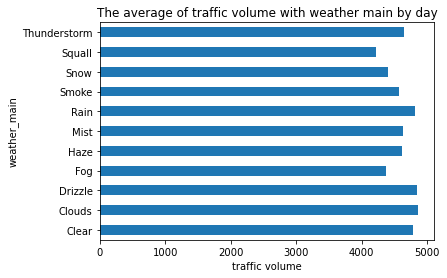

In [24]:
# VISUALIZE WEATHER MAIN BY DAY
by_weather_main['traffic_volume'].plot.barh()
plt.title('The average of traffic volume with weather main by day')
plt.xlabel('traffic volume')
plt.show()

FOR THE AVERAGE OF TRAFFIC VOLUME WITH **'WEATHER MAIN'** BY DAY. WE DON'T SEE ANY WEATHER THAT ANY TRAFFIC VOLUME EXCEED TO 5,000 CARS. BUT EVERY WEATHER HAVE THE TRAFFIC VOLUME MORE THAN 4,000 CARS THAT MEAN EVERY WEATHER AFFECT TO TRAFFIC VOLUME OR THIS MAKES FINDING A HEAVY TRAFFIC INDICATOR MORE DIFFICULT.

LET'S ALSO GROUP BY **'WEATHER_DESCRIPTION'**, WHICH HAS A MORE GRANULAR WEATHER CLASSIFICATION.

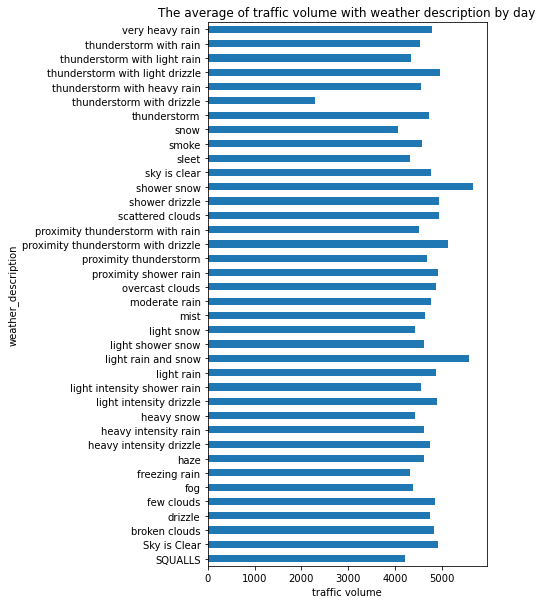

In [25]:
# VISUALIZE AVERAGE OF TRAFFIC VOLUME WITH WEATHER DESCRIPTION BY DAY
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.title('The average of traffic volume with weather description by day')
plt.xlabel('traffic volume')
plt.show()

IT LOOKS LIKE THERE ARE THREE WEATHER TYPES WHERE TRAFFIC VOLUME EXCEEDDS 5,000:

    SHOW SNOW
    LIGHT RAIN AND SNOW
    PROXIMITY THUNDERSTORM WITH DRIZZLE
    
IT'S NOT CLEAR WHY THESE WEATHER TYPES HAVE THE HIGHEST AVERAGE TRAFFIC VALUES - THIS IS BAD WEATHER, BUT NOT THAT BAD. PERHAPS MORE PEOPLE TAKE THEIR CARS OUT OF THE GARAGE WHEN THE WEATHER IS BAD INSTEAD OF RIDING A BIKE OR WALKING

### CONCLUSION

IN THIS PROJECT, WE TRIED TO FIND A FEW INDICATORS OF HEAVY TRAFFIC ON THE I-94 INTERSTATE HIGHWAY. WE MANAGED TO FIND TWO TYPES OF INDICATORS:

    TIME INDICATORS
           THE TRAFFIC IS USUALLY HEAVIER DURING WARM MONTHS (MARCH-OCTOBER) COMPARED TO COLD MONTHS (NOVEMBER-FEBUARY).
           THE TRAFFIC IS USUALLY HEAVIER ON BUSINESS DAYS COMPARED TO THE WEEKENDS.
           ON BUSINESS DAYS, THE RUSH HOURS ARE AROUND 7 AND 16.
           
    WEATHER INDICORS
            SHOWER SNOW
            LIGHT RAIN AND SNOW
            PROXIMITY THUNDERSTORM WITH DRIZZLE